In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-dataset/Housing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('/kaggle/input/housing-price-dataset/Housing.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Convert the date column type to DateTime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

In [8]:
df = df.drop_duplicates()

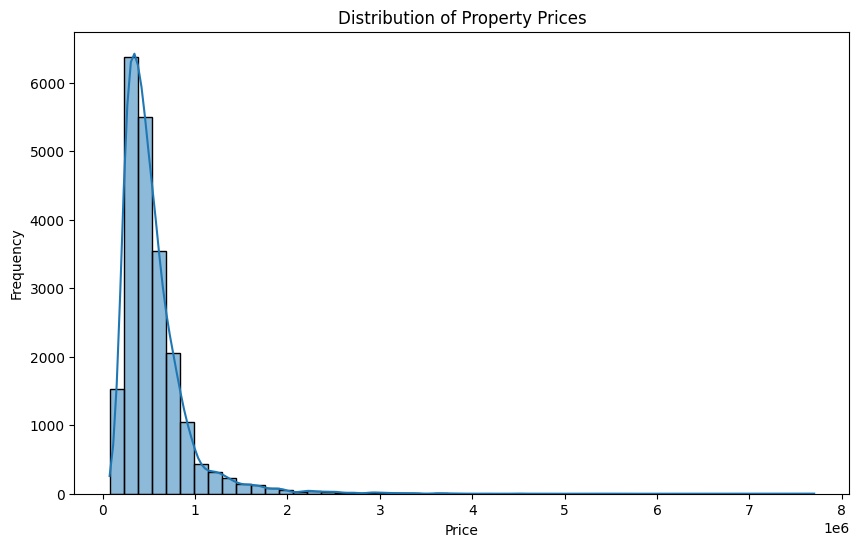

In [9]:
# Suppress the specific FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

# Replace infinite values with NaN and drop any rows with NaN values in the 'price' column
df['price'] = df['price'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['price'])

# Distribution of Property Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

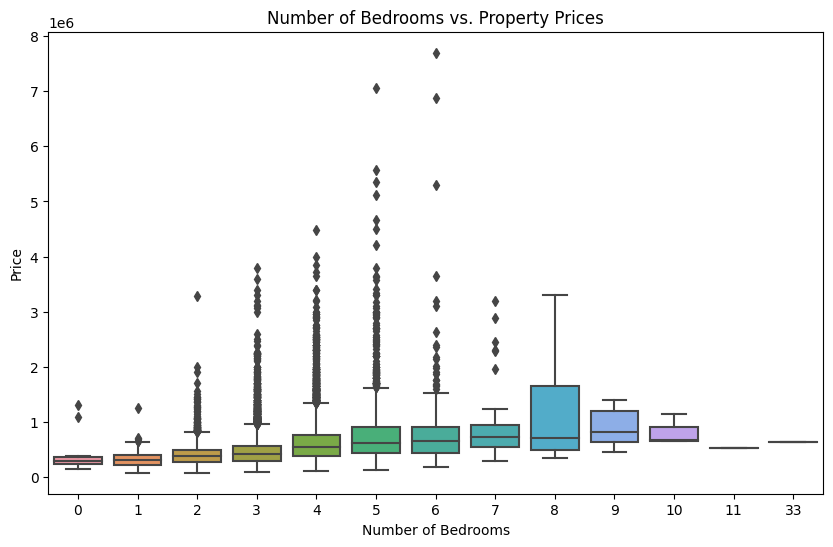

In [10]:
# Number of Bedrooms vs. Property Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Number of Bedrooms vs. Property Prices')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

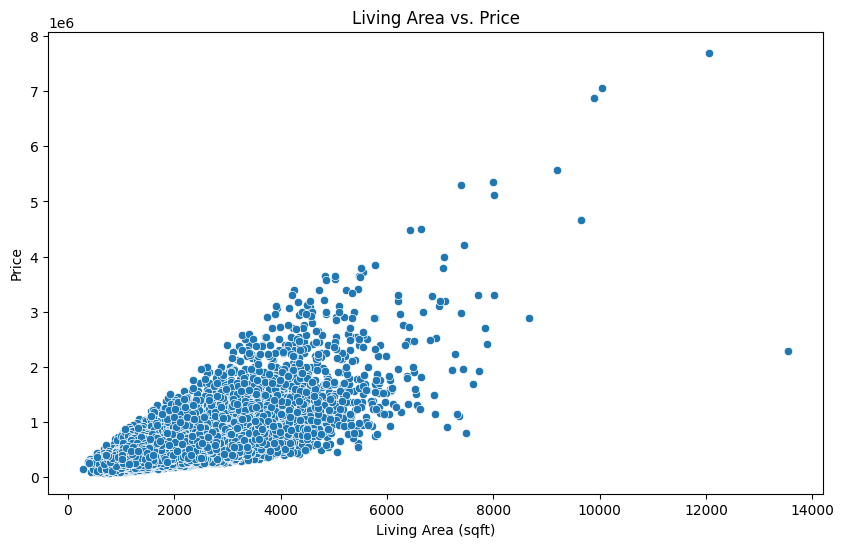

In [11]:
# Scatter Plot of Living Area vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Living Area vs. Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

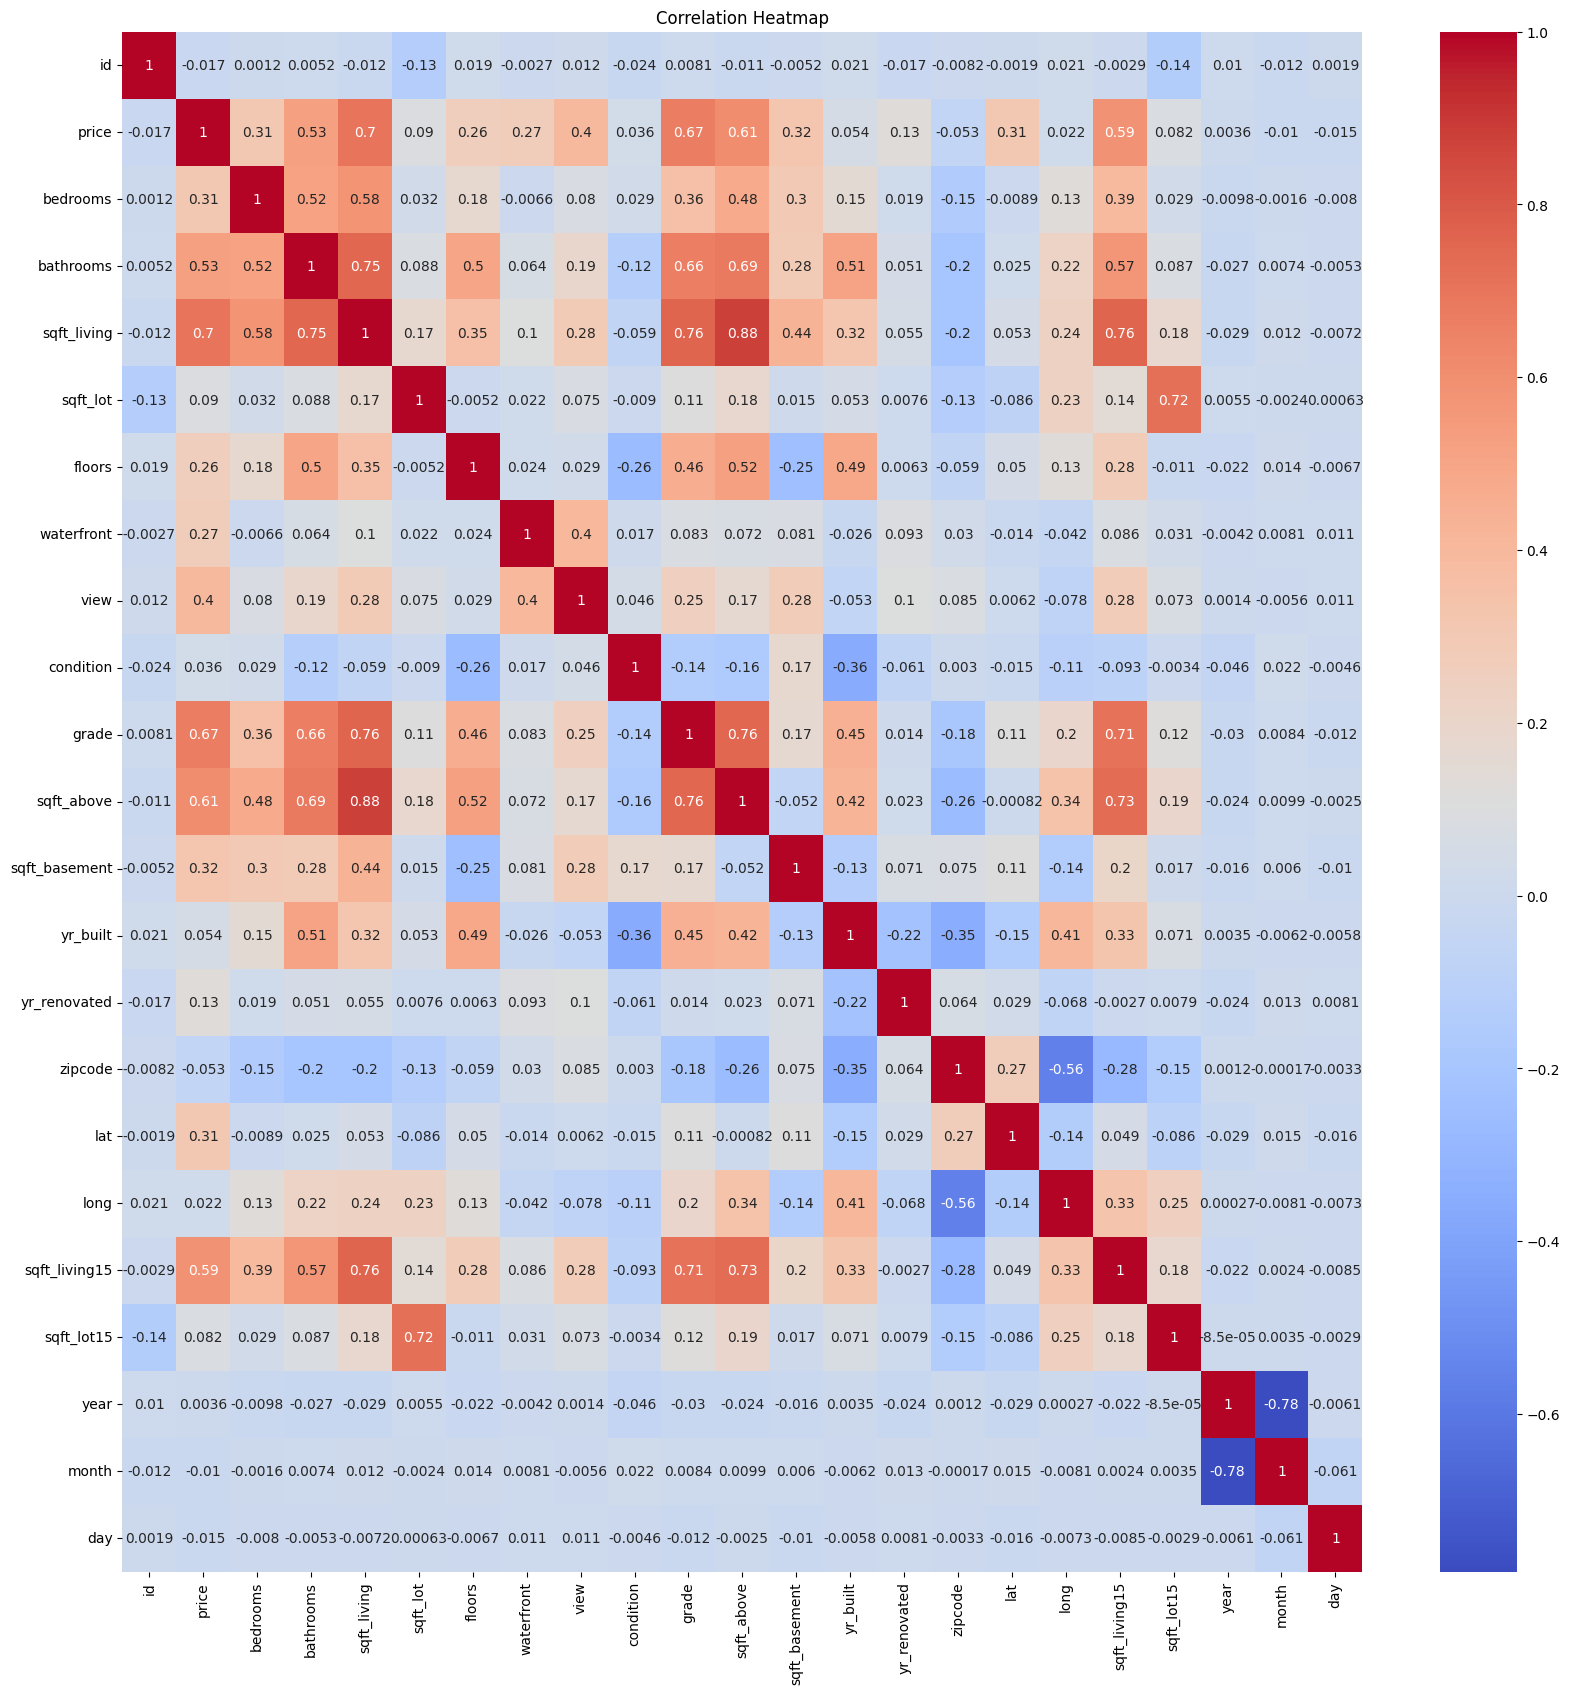

In [12]:
# Correlation Heatmap
# Drop non-numeric columns for correlation computation
numeric_df = df.select_dtypes(include=[float, int])

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

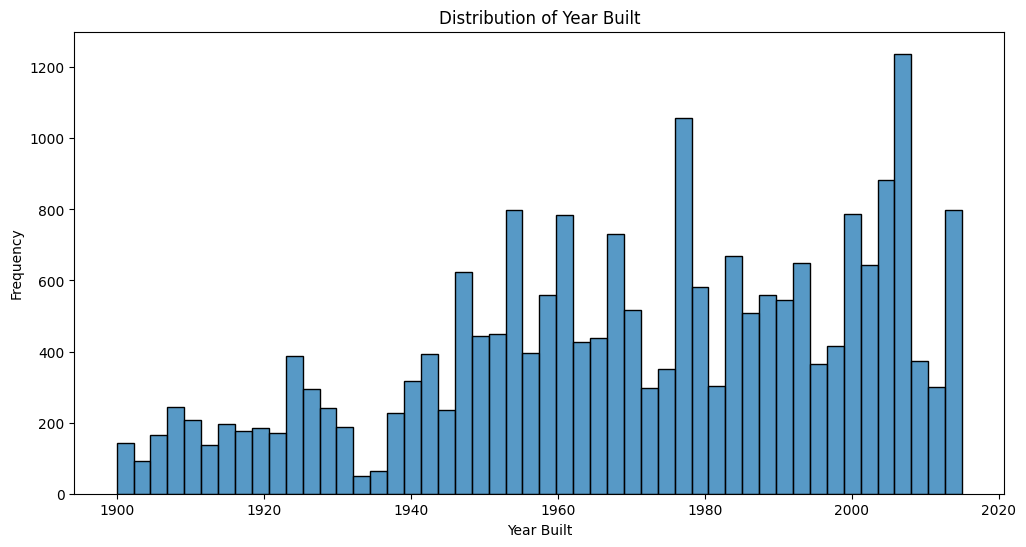

In [13]:
# Price Distribution by Year Built
plt.figure(figsize=(12, 6))
sns.histplot(df['yr_built'], bins=50, kde=False)
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

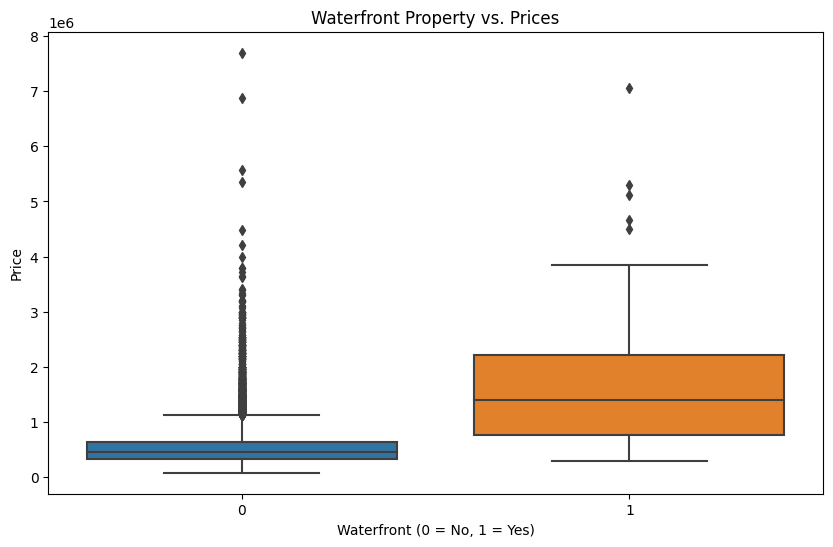

In [14]:
# Price by Waterfront
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Waterfront Property vs. Prices')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

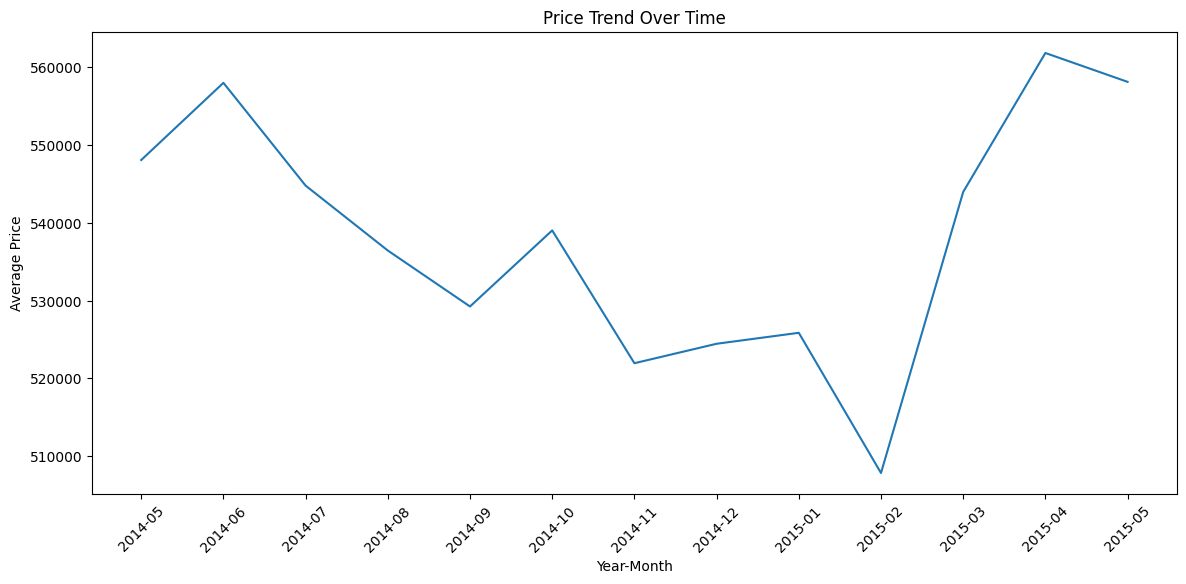

In [15]:
# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month for better granularity
df['year_month'] = df['date'].dt.to_period('M')

# Group by year and month and calculate the mean price
price_trend = df.groupby('year_month')['price'].mean().reset_index()

# Convert year_month to string for plotting
price_trend['year_month'] = price_trend['year_month'].astype(str)

# Plotting the price trend over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='year_month', y='price', data=price_trend)
plt.title('Price Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()